This notebook shows how to work around Chinese font issue

## Trials and Errors

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt


Text(0.5,1,'測試')

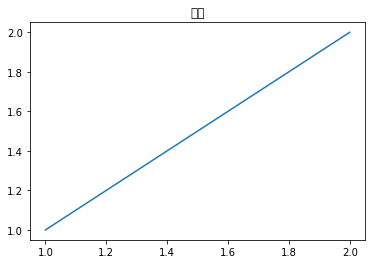

In [2]:
plt.plot([1, 2], [1, 2])
plt.title('測試')

Seems `.ttc` is font is not loaded on my system. Although I can see this file on my computer, the font is not available from matplotlib.

In [3]:
path = '/Library/Fonts/Songti.ttc'
prop = mpl.font_manager.FontProperties(fname=path)
mpl.rcParams['font.family'] = prop.get_name()
%matplotlib inline

Text(0.5,1,'測試')

/Users/hupili/Desktop/project/python-for-data-and-media-communication/venv/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Songti SC'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


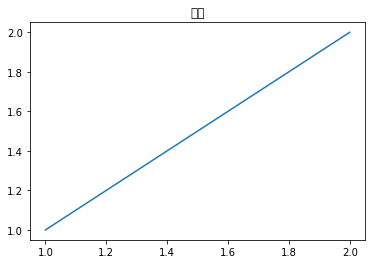

In [4]:
plt.plot([1, 2], [1, 2])
plt.title('測試')

Text(0.5,1,'測試')

/Users/hupili/Desktop/project/python-for-data-and-media-communication/venv/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Songti SC'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


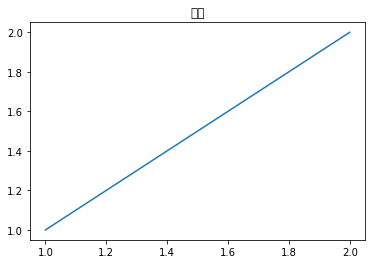

In [5]:
plt.plot([1, 2], [1, 2])
plt.title('測試')

In [6]:
import matplotlib.font_manager
all_sys_fonts = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

In [7]:
path in all_sys_fonts

False

In [8]:
matplotlib.font_manager

<module 'matplotlib.font_manager' from '/Users/hupili/Desktop/project/python-for-data-and-media-communication/venv/lib/python3.6/site-packages/matplotlib/font_manager.py'>

In [9]:
#all_sys_fonts

In [10]:
'/Library/Fonts/Arial Unicode.ttf' in all_sys_fonts

True

## Solution

Find one font from `all_sys_fonts`. That will work. Next question is what fonts support Chinese (among so many choices)? 

One heuristic is that Chinese fonts are usually much larger than pure ASCII fonts. So we can list all candidate font files on the system and try the ones with large file size. Following is the sample code on MAC

In [11]:
!ls -hlS /Library/Fonts/ | head -n10

total 331M
-rw-r--r-- 1 root wheel   64M Aug 18 05:56 Songti.ttc
-rw-r--r-- 1 root wheel   23M Aug 18 05:58 Arial Unicode.ttf
-rw-r--r-- 1 root wheel   18M Jun 18  2017 AppleMyungjo.ttf
-rw-r--r-- 1 root admin   17M Jul 21  2015 AdobeKaitiStd-Regular.otf
-rw-r--r-- 1 root admin   15M Jul 21  2015 AdobeSongStd-Light.otf
-rw-r--r-- 1 root wheel   15M Jul 13  2017 AppleGothic.ttf
-rw-r--r-- 1 root admin   14M Jul 21  2015 AdobeFangsongStd-Regular.otf
-rw-r--r-- 1 root admin   12M Jul 21  2015 AdobeHeitiStd-Regular.otf
-rw-r--r-- 1 root admin  9.8M Jul 21  2015 AdobeMingStd-Light.otf


Just for comparison, the following small files are apparently not Chinese fonts

In [12]:
!ls -hls /Library/Fonts/ | head -n10

total 331M
140K -rw-r--r-- 1 root admin  140K Jul 21  2015 ACaslonPro-Bold.otf
168K -rw-r--r-- 1 root admin  166K Jul 21  2015 ACaslonPro-BoldItalic.otf
168K -rw-r--r-- 1 root admin  165K Jul 21  2015 ACaslonPro-Italic.otf
164K -rw-r--r-- 1 root admin  164K Jul 21  2015 ACaslonPro-Regular.otf
168K -rw-r--r-- 1 root admin  167K Jul 21  2015 ACaslonPro-Semibold.otf
168K -rw-r--r-- 1 root admin  168K Jul 21  2015 ACaslonPro-SemiboldItalic.otf
 76K -rw-r--r-- 1 root admin   76K Jul 21  2015 AGaramondPro-Bold.otf
 80K -rw-r--r-- 1 root admin   77K Jul 21  2015 AGaramondPro-BoldItalic.otf
 92K -rw-r--r-- 1 root admin   92K Jul 21  2015 AGaramondPro-Italic.otf


In [13]:
path = '/Library/Fonts/Arial Unicode.ttf'
prop = mpl.font_manager.FontProperties(fname=path)
mpl.rcParams['font.family'] = prop.get_name()
%matplotlib inline

Text(0.5,1,'測試')

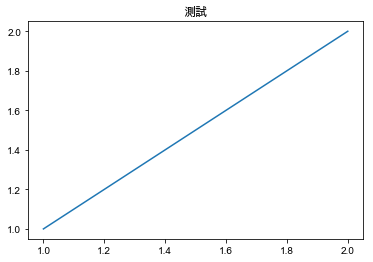

In [14]:
plt.plot([1, 2], [1, 2])
plt.title('測試')

Text(0.5,1,'測試')

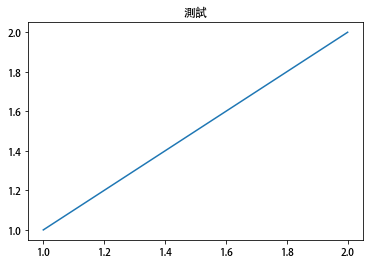

In [15]:
path = '/Library/Fonts/AdobeHeitiStd-Regular.otf'
prop = mpl.font_manager.FontProperties(fname=path)
mpl.rcParams['font.family'] = prop.get_name()
plt.plot([1, 2], [1, 2])
plt.title('測試')

## Further discussion

- Support of `ttc` in matplotlib. There are some pointers to free Chinese font. https://github.com/matplotlib/matplotlib/pull/3912